In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [144]:
df = pd.read_csv('Ecommerce Customers.csv')

In [34]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


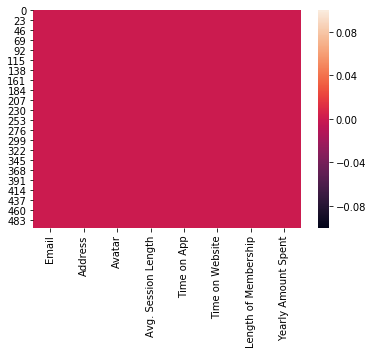

In [35]:
sns.heatmap(df.isnull())

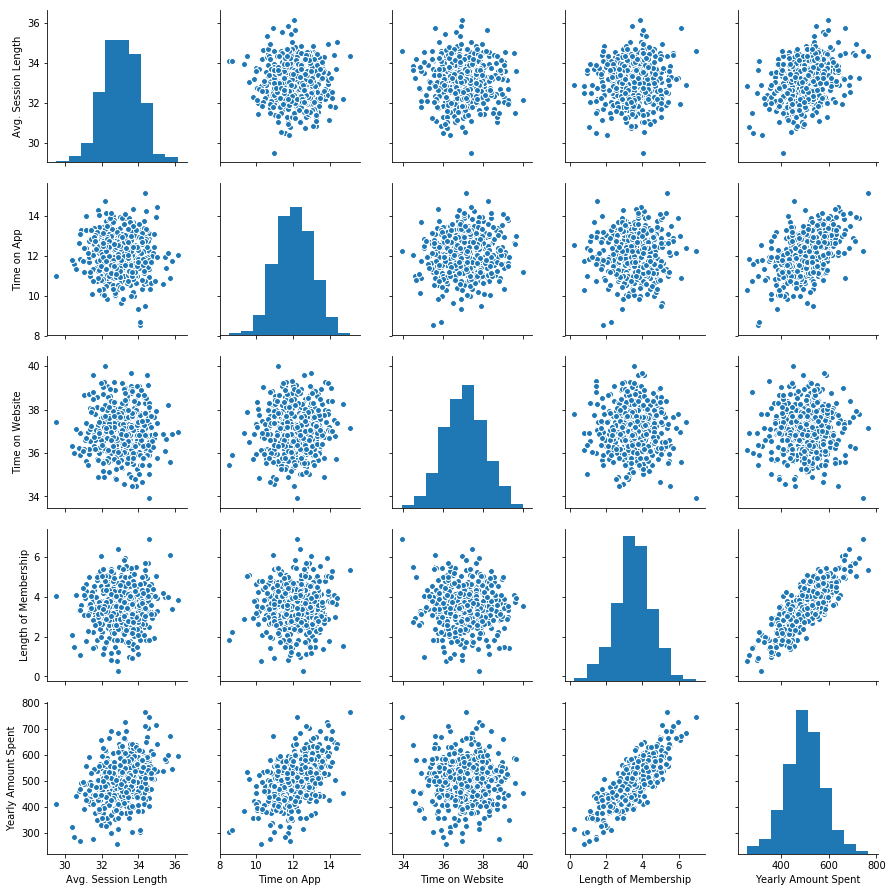

In [73]:
sns.pairplot(df)

In [69]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


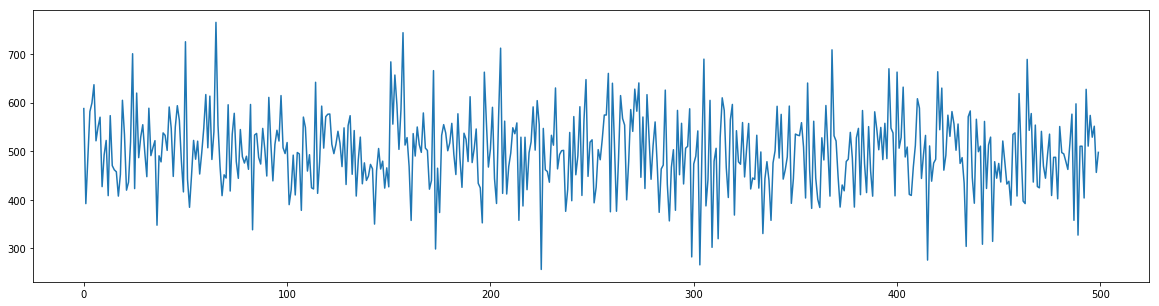

In [36]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(df['Yearly Amount Spent'])

In [145]:
# Drop features that do not relate to yearly amount spent
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [38]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5)
memory usage: 19.6 KB


In [93]:
# convert the dataframe to array to be easier to use in the forloo
#df_x = df.values
# exclude the dependent variable
df_x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
df_y = df['Yearly Amount Spent']

X_train = np.array(df_x[0:400])
y_train = np.array(df_y[0:400])

X_test = np.array(df_x[400:])
y_test = np.array(df_y[400:])

# Now let's start writing the codes for gradient descent for the linear regression.


In [42]:
# declare hte variables with some reasonable values
regressors = len(X_train[0]) 
init_m = 0
init_b = [0 for x in range(regressors)]
learning_rate = 0.0001
num_iteration = 500 
N = len(X_train) 


# training set
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    
    store_m.append(minimized_m)
    store_b.append(minimized_b)
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate)
    return [init_m1, init_b1] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller



m, b = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)       

intercept:  0.168446527296 Slope:  [6.8058544495417372, 3.8417810813771629, 5.8467307747541151, 3.6211762284266222]


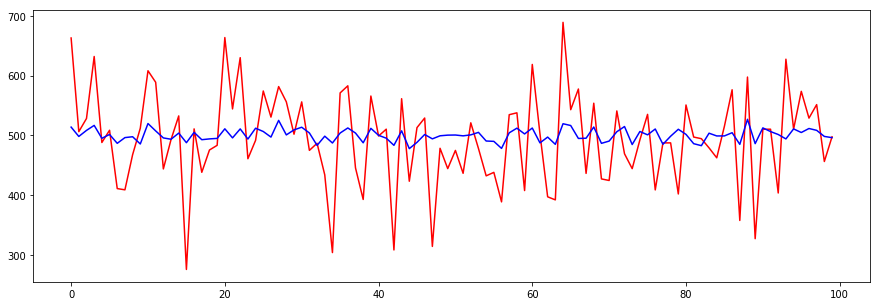

In [43]:
sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0

fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')

Text(0.5,1,'Residual plot')

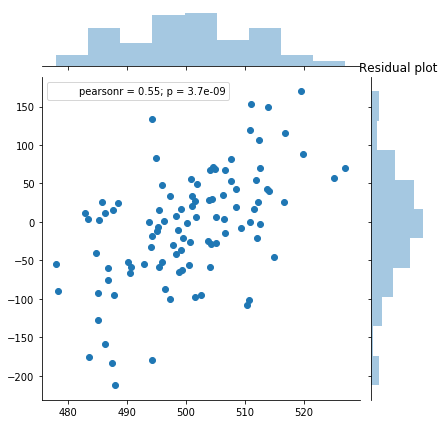

In [46]:
# the predicted values need to be an array to be used in the plot
predicted_values = np.array(predicted_y)

sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [48]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Learning rate:  0.0001
intercept:  0.168446527296
parameters [6.8058544495417372, 3.8417810813771629, 5.8467307747541151, 3.6211762284266222]
R square:  0.144000426283
Rmse:  73.5393792145


# Check under fit or over fit

In [16]:
X_train = np.array(df_x[0:300])
y_train = np.array(df_y[0:300])

cv_X_train = np.array(df_x[300:400])
cv_y_train = np.array(df_y[300:400])


In [17]:
# error for the training set
# increase from 1 training set to k training sets
training_set_error=[]
init_error = 0.0
total_error =0.0
N = len(cv_X_train)
sums=0
sums2=0
sums3=0
# training = 1
for x in range(1):
    for y in range(regressors):
        sums += b[y] * X_train[x][y]
    training_set_error.append(0.5 * (m + sums - y_train[x])**2)
    
# start from 2 so the inner for loop will work
for i in range(2, N):
    for j in range(0,i):
        for k in range(regressors):
            sums2 += b[k] * X_train[j][k]
        init_error += (((m + sums2) - y_train[j])**2)
        sums2 = 0
    total_error = (1/(2 * i) * init_error)
    training_set_error.append(total_error)
    init_error = 0.0
    total_error = 0.0
    if(i == 99):
        for l in range(N):
            for ll in range(regressors):
                sums3 += b[ll] * X_train[l][ll]
            init_error += (((m + sums3) - y_train[l])**2)
            sums3 = 0
        total_error = (1/(2 * N) * init_error)
        training_set_error.append(total_error)
        init_error = 0.0

        
        
# error for the cross validation set
init_error = 0.0
total_error =0.0
cv_training_set_error=[]
N2 = len(cv_X_train)
sums=0
sums2=0
sums3=0

# training = 1
for x in range(1):
    for y in range(regressors):
        sums += b[y] * cv_X_train[x][y]
    cv_training_set_error.append(0.5 * (m + sums - cv_y_train[x])**2)


# start from 2 so the inner for loop will work
for i in range(2, N):
    for j in range(0,i):
        for k in range(regressors):
            sums2 += b[k] * cv_X_train[j][k]
        init_error += (((m + sums2) - cv_y_train[j])**2)
        sums2 = 0
    total_error = (1/(2 * i) * init_error)
    cv_training_set_error.append(total_error)
    init_error = 0.0
    total_error =0.0
    if(i == 99):
        for l in range(N):
            for ll in range(regressors):
                sums3 += b[ll] * cv_X_train[l][ll]
            init_error += (((m + sums3) - cv_y_train[l])**2)
            sums3 = 0
        total_error = (1/(2 * N) * init_error)
        cv_training_set_error.append(total_error)
        init_error = 0.0


In [18]:
training_size = [int (x)for x in range(len(cv_X_train))]

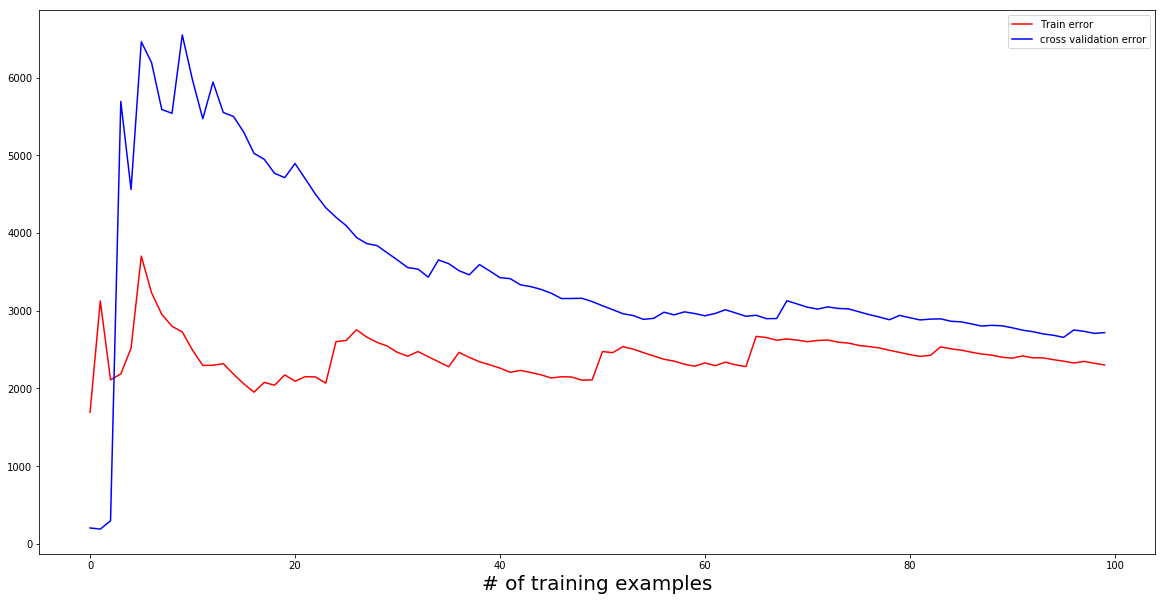

In [19]:
fig,ax = plt.subplots(figsize=(20,10))
a1, = ax.plot(training_size,training_set_error, color='red')
a2, = ax.plot(training_size,cv_training_set_error, color='blue')
plt.xlabel('# of training examples',size=20)
plt.legend([a1,a2],['Train error', 'cross validation error'])

# Let's include the regularization term

In [94]:
# the arrays were changed to find out if the model is under or over fit. now change it back.

X_train = np.array(df_x[0:400])
y_train = np.array(df_y[0:400])

X_test = np.array(df_x[400:])
y_test = np.array(df_y[400:])

In [95]:
# declare hte variables with some values
regressors = len(X_train[0])
init_m = 0
init_b = [0 for x in range(regressors)]
learning_rate = 0.0001
num_iteration = 500
N = len(X_train)
landa = 100


# training set
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate, landa):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_m)

    for l in range(regressors):
        minimized_b[l] = init_b1[l] * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_b[l])
        
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration, landa):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate, landa)
    return [init_m1, init_b1] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller



m, b = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa)
print ("intercept: ",m, "Slope: ",b)       

intercept:  0.168566814947 Slope:  [6.8021673969326386, 3.832081599161675, 5.8536247549200748, 3.6029830464173651]


Text(0.5,1,'Residual plot')

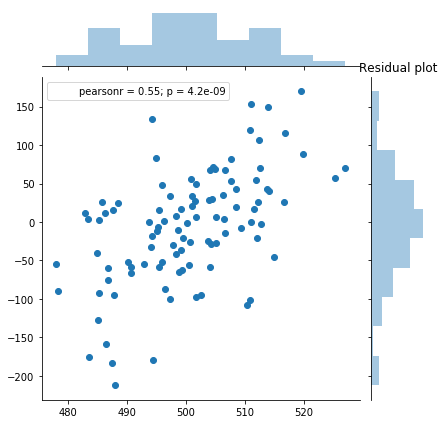

In [96]:
sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0


# the predicted values need to be an array to be used in the plot
predicted_values = np.array(predicted_y)

sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [97]:
print('Learning rate:',learning_rate)
print('landa:',landa)
print('intercept:', m)
print('parameters:',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Learning rate: 0.0001
landa: 100
intercept: 0.168566814947
parameters: [6.8021673969326386, 3.832081599161675, 5.8536247549200748, 3.6029830464173651]
R square:  0.143602161279
Rmse:  73.5564848044


# Tune the learning rate, number of iteration,  and landa

In [262]:
# add the learning rate and landa as arguments

def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate, landa):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_m)

    for l in range(regressors):
        minimized_b[l] = init_b1[l] * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_b[l])
        
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration, landa):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate, landa)
    return [init_m1, init_b1, learning_rate ,num_iteration,landa] 

In [ ]:
Learning rate

In [283]:

# declare hte variables with some values
regressors = len(X_train[0])
init_m = 0
init_b = [0 for x in range(regressors)]
N = len(X_train)

num_iteration = 500
landa = 100
learning_rate = [0.0008, 0.00075 ,0.0007,0.00065, 0.0006, 0.0005, 0.0004, 0.0001]
best_r_square = 0

l_rate_d={}

for i in range(len(learning_rate)):
    m, b, l_rate, num_i, lan = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate[i], num_iteration, landa)
   
    sub_sum=0
    predicted_y=[]
    for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum += b[j]*X_test[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    br = metrics.r2_score(y_test, predicted_y)
    l_rate_d[l_rate]=br
    
    if( br > best_r_square):
        best_r_square = br
        best_m = m
        best_b = [ x for x in b]
        best_learning_rate = l_rate


predicted_y = []
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_test[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('learning rate and r square:',l_rate_d )
print('Number of iteration:', num_i)
print('best_learning_rate:',best_learning_rate)
print('landa:', landa)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

learning rate and r square: {0.0008: -3.3551172436922928e+43, 0.00075: 0.49457758311921973, 0.0007: 0.47557721431983935, 0.00065: 0.45551836644314092, 0.0006: 0.43433730465714515, 0.0005: 0.38833409955821363, 0.0004: 0.33697448977158262, 0.0001: 0.14360216127884795}
Number of iteration: 500
best_learning_rate: 0.00075
landa: 100
intercept:  0.0338994263865
parameters [9.1481584750388354, 11.797338017887057, -0.26938203704938107, 18.688606087525397]
R square:  0.494577583119
Rmse:  56.508064905


Text(0.5,1,'Residual plot')

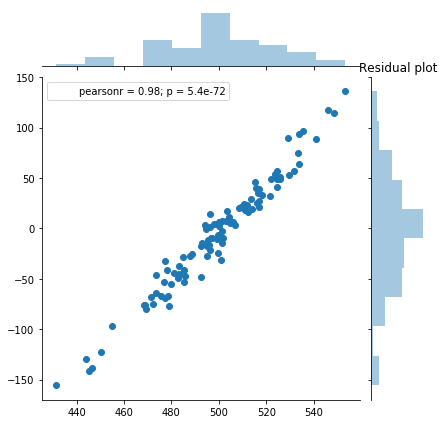

In [284]:
sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [277]:


num_iteration = 2000 # from 500
learning_rate = 0.00075

m, b, l_rate, num_i, lan = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa)
        
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum2 += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum2)
    sub_sum2 = 0
    
predicted_values = np.array(predicted_y)

print('Number of iteration:', num_i)
print('best_learning_rate:',l_rate)
print('best landa:', lan)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Number of iteration: 2000
best_learning_rate: 0.00075
best landa: 100
intercept:  -0.334656105
parameters [11.457797441014245, 24.024411967091066, -8.4475391521309877, 41.152738148731153]
R square:  0.819502887948
Rmse:  33.7690088605


Text(0.5,1,'residual')

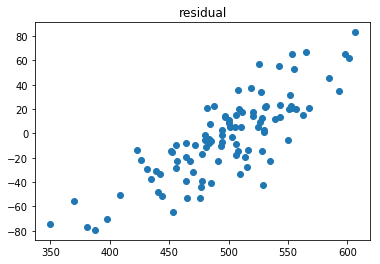

In [278]:
plt.scatter(predicted_values, y_test - predicted_values )
plt.title('residual')

In [285]:


num_iteration = 5000 # from 500
learning_rate = 0.00075

m, b, l_rate, num_i, lan = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa)
        
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum2 += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum2)
    sub_sum2 = 0
    
predicted_values = np.array(predicted_y)

print('Number of iteration:', num_i)
print('best_learning_rate:',l_rate)
print('best landa:', lan)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Number of iteration: 5000
best_learning_rate: 0.00075
best landa: 100
intercept:  -0.795783525863
parameters [11.401139413736649, 27.890371080580881, -10.292699635711697, 47.936699454724241]
R square:  0.870926765053
Rmse:  28.556257053


In [286]:

num_iteration = 10000 # from 500
learning_rate = 0.00075

m, b, l_rate, num_i, lan = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa)
        
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum2 += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum2)
    sub_sum2 = 0
    
predicted_values = np.array(predicted_y)

print('Number of iteration:', num_i)
print('best_learning_rate:',l_rate)
print('best landa:', lan)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Number of iteration: 10000
best_learning_rate: 0.00075
best landa: 100
intercept:  -1.15807977143
parameters [11.32645520901759, 28.14712139133368, -10.342299868281852, 48.378436624017795]
R square:  0.873500527828
Rmse:  28.2701128369


Text(0.5,1,'residual')

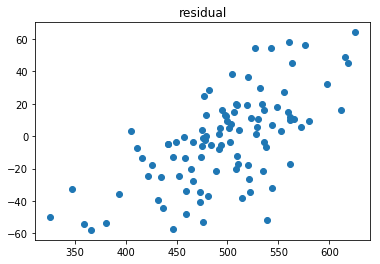

In [287]:
plt.scatter(predicted_values, y_test - predicted_values )
plt.title('residual')

In [291]:

num_iteration = 5000
landa = [1,10,100,1000,5000,10000]
learning_rate = 0.00075
best_r_square = 0

l_rate_d={}

for i in range(len(landa)):
    m, b, l_rate, num_i, lan = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa[i])
   
    predicted_y=[]
    for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum += b[j]*X_test[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    br = metrics.r2_score(y_test, predicted_y)
    l_rate_d[lan]=br
    
    if( br > best_r_square):
        best_r_square = br
        best_m = m
        best_b = [ x for x in b]
        best_landa = lan

predicted_y = []
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_test[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('learning rate and r square:',l_rate_d )
print('Number of iteration:', num_i)
print('best_learning_rate:',best_learning_rate)
print('landa:', lan)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

learning rate and r square: {1: 0.90790345560179508, 10: 0.90654448687569689, 100: 0.87092676505302991, 1000: 0.47809601666324886, 5000: 0.18765967643435388, 10000: 0.13245950146280427}
Number of iteration: 5000
best_learning_rate: 0.00075
landa: 10000
intercept:  -1.30574549381
parameters [11.874705199578839, 33.882423536933139, -13.679427394728966, 58.687782489279556]
R square:  0.907903455602
Rmse:  24.1215300926


Text(0.5,1,'residual')

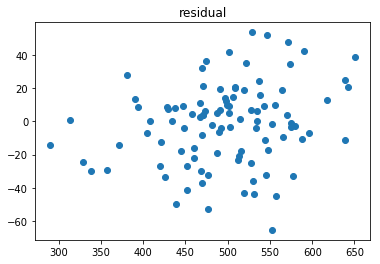

In [292]:
plt.scatter(predicted_values, y_test - predicted_values )
plt.title('residual')

In [ ]:
much better. the last landa is picked, so maybe increase its value further will help. But lets stop here.

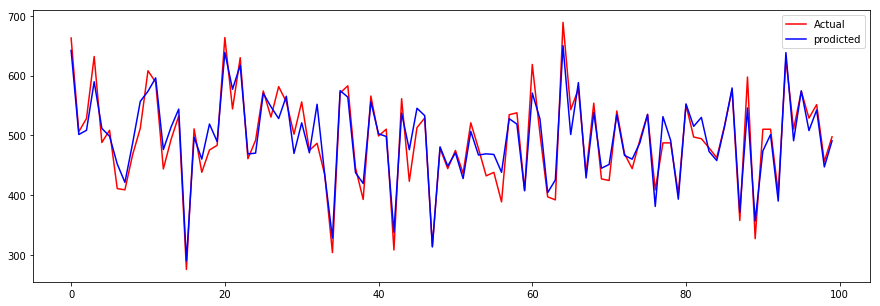

In [293]:
fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')
plt.legend([a1,a2], ["Actual", "prodicted"])